In [11]:
import json
import csv
import pandas as pd
import numpy as np
import gc
import re
import datetime as dt

#plotting
import matplotlib.pyplot as plt 
import seaborn as sns

#map
import folium

def ReadJSONitems(file_name, within_list=False):
    items = []
    with open(file_name, encoding='utf8') as read_file:
        if not within_list:
            for row in read_file:
                items.append(json.loads(row))
        else:
            items = json.load(read_file)
    return items

def null(dataframe): #generate null count summary by descending number
    null_df = pd.DataFrame(dataframe.isnull().sum()).reset_index() #count null values
    null_df = null_df.rename(columns={'index':'colnames', 0:'null'})
    null_df['null_ratio%'] = round(null_df['null']/dataframe.shape[0]*100, 4) #calculate null ratio
    null_df = null_df.sort_values(by='null_ratio%', ascending=False)
    return null_df


# os.chdir('C:/Users/zzlen/OneDrive - Seattle University/MSBA/5. Fall 2022/BUAN 5510/Capstone Project/Yelp Review/JSON')

pd.set_option('display.max_columns', None)

In [2]:
reduced_reviews_list = ReadJSONitems('review_restaurants_PA_FL.json')[0]
reduced_reviews_list #list of dictionaries

[{'review_id': 'KU_O5udG6zpxOg-VcAEodg',
  'user_id': 'mh_-eMZ6K5RLWhZyISBhwA',
  'business_id': 'XQfwVwDr-v0ZS3_CbbE5Xw',
  'stars': 3.0,
  'useful': 0,
  'funny': 0,
  'cool': 0,
  'text': "If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.",
  'date': '2018-07-07 22:09:11'},
 {'review_id': 'AqPFMleE6RsU23_auESxiA',
  'user_id': '_7bHUi9Uuf5__HHc_Q8guQ',
  'business_id': 'kxX2SOes4o-D3ZQBkiMRfA',
  'stars': 5.0,
  'useful': 1,
  'funny': 0,
  'cool': 1,
  'text': "Wow!  Yummy, different,  delicious.   Our favorite is the lamb c

In [3]:
type(reduced_reviews_list)

list

In [4]:
type(reduced_reviews_list[0])

dict

In [5]:
reduced_review_df = pd.DataFrame(reduced_reviews_list) #convert to DF

In [6]:
reduced_review_df.head(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
2,OAhBYw8IQ6wlfw1owXWRWw,1C2lxzUo1Hyye4RFIXly3g,BVndHaLihEYbr76Z0CMEGw,5.0,0,0,0,"Great place for breakfast! I had the waffle, w...",2014-10-11 16:22:06
3,oyaMhzBSwfGgemSGuZCdwQ,Dd1jQj7S-BFGqRbApFzCFw,YtSqYv1Q_pOltsVPSx54SA,5.0,0,0,0,Tremendous service (Big shout out to Douglas) ...,2013-06-24 11:21:25
4,Xs8Z8lmKkosqW5mw_sVAoA,IQsF3Rc6IgCzjVV9DE8KXg,eFvzHawVJofxSnD7TgbZtg,5.0,0,0,0,My absolute favorite cafe in the city. Their b...,2014-11-12 15:30:27


In [7]:
reduced_review_df.shape

(1486798, 9)

In [8]:
reduced_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1486798 entries, 0 to 1486797
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   review_id    1486798 non-null  object 
 1   user_id      1486798 non-null  object 
 2   business_id  1486798 non-null  object 
 3   stars        1486798 non-null  float64
 4   useful       1486798 non-null  int64  
 5   funny        1486798 non-null  int64  
 6   cool         1486798 non-null  int64  
 7   text         1486798 non-null  object 
 8   date         1486798 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 102.1+ MB


In [9]:
# Convert date to date type

import warnings
warnings.filterwarnings("ignore")

reduced_review_df['date'] = pd.to_datetime(reduced_review_df['date'])
reduced_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1486798 entries, 0 to 1486797
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   review_id    1486798 non-null  object        
 1   user_id      1486798 non-null  object        
 2   business_id  1486798 non-null  object        
 3   stars        1486798 non-null  float64       
 4   useful       1486798 non-null  int64         
 5   funny        1486798 non-null  int64         
 6   cool         1486798 non-null  int64         
 7   text         1486798 non-null  object        
 8   date         1486798 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 102.1+ MB


## Null Values

In [10]:
null = null(reduced_review_df)
# null[null['null'] > 0]
null

,colnames,null,null_ratio%
0,review_id,0,0.0
1,user_id,0,0.0
2,business_id,0,0.0
3,stars,0,0.0
4,useful,0,0.0
5,funny,0,0.0
6,cool,0,0.0
7,text,0,0.0
8,date,0,0.0


#### Add New Columns

In [18]:
import datetime as dt

warnings.filterwarnings("ignore")

review_text['yelping_since_year'] =  review_text['yelping_since_u'].dt.year
review_text['reviewed_year'] =  review_text['reviewed_date'].dt.year
review_text['yelping_years'] =  pd.to_datetime('today').year - review_text['yelping_since_year']
review_text['text_len'] = review_text['reviewed_text'].apply(len)
review_text

,stars_r,useful_r,funny_r,cool_r,reviewed_text,reviewed_date,yelping_since_u,yelping_since_year,reviewed_year,yelping_years,text_len
0,4.0,0,0,1,This is nice little Chinese bakery in the hear...,2014-05-26 01:09:53,2009-12-29 09:27:50,2009.0,2014,13.0,407
1,4.0,3,1,2,This is the bakery I usually go to in Chinatow...,2013-10-05 15:19:06,2008-04-09 02:40:37,2008.0,2013,14.0,609
2,5.0,0,0,0,"A delightful find in Chinatown! Very clean, an...",2013-10-25 01:34:57,2013-03-27 05:46:52,2013.0,2013,9.0,229
3,5.0,5,0,5,I ordered a graduation cake for my niece and i...,2018-05-20 17:58:57,2011-12-26 17:28:28,2011.0,2018,11.0,161
4,4.0,2,1,1,HK-STYLE MILK TEA: FOUR STARS\n\nNot quite su...,2013-10-25 02:31:35,2011-08-31 21:39:28,2011.0,2013,11.0,972
...,...,...,...,...,...,...,...,...,...,...,...
1487274,5.0,0,0,0,Ordered delivery for some tacos on a Saturday ...,2020-12-06 00:19:29,2013-10-10 15:18:41,2013.0,2020,9.0,316
1487275,5.0,2,1,1,First time trying this restaurant and I had a ...,2020-11-30 23:19:40,2018-08-02 23:01:23,2018.0,2020,4.0,667
1487276,5.0,1,1,1,This restaurant is truly amazing!!! The owner ...,2021-03-27 19:33:29,2020-03-20 05:38:30,2020.0,2021,2.0,296
1487277,4.0,1,0,0,Recently got take out from adelita; they were ...,2021-02-07 15:09:25,2014-12-21 16:12:59,2014.0,2021,8.0,345


#### Convert Stars to Binary
If rating = 5 then 1, otherwise 0

In [19]:
def fiveStar(column):
    if column == 5:
        result = 1
    else:
        result = 0
        
    return result

## Descriptive Statistics

In [12]:
reduced_review_df.describe().apply(lambda s: s.apply('{0:.4f}'.format))

,stars,useful,funny,cool
count,1486798.0000,1486798.0000,1486798.0000,1486798.0000
mean,3.8224,0.9866,0.3019,0.4873
std,1.3828,2.7118,1.4333,2.1614
min,1.0000,-1.0000,-1.0000,-1.0000
25%,3.0000,0.0000,0.0000,0.0000
50%,4.0000,0.0000,0.0000,0.0000
75%,5.0000,1.0000,0.0000,0.0000
max,5.0000,227.0000,227.0000,207.0000


## Star Rating

In [13]:
stars = pd.DataFrame(reduced_review_df['stars'].value_counts()).reset_index().rename(columns={'index':'stars', 'stars':'count'})
stars['%'] = round(stars['count'] / reduced_review_df.shape[0] * 100,  1)
stars

,stars,count,%
0,5.0,668970,45.0
1,4.0,354742,23.9
2,1.0,174131,11.7
3,3.0,167351,11.3
4,2.0,121604,8.2


#### How Many Five Star Rating Given By Users to the Restaurants

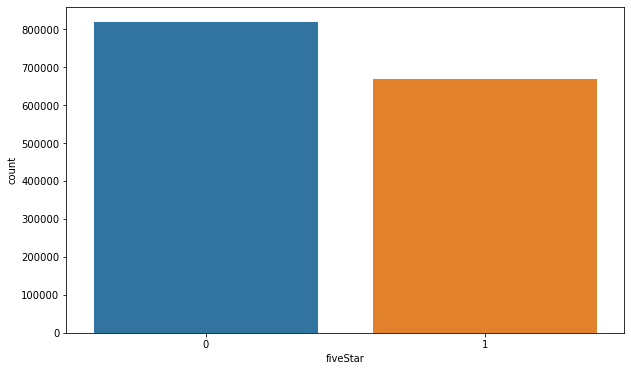

In [23]:
fig,ax= plt.subplots(figsize=(10,6))
sns.countplot(x='fiveStar', data=review_text)
plt.show()

In [24]:
review_text.fiveStar.value_counts()

0    818073
1    669206
Name: fiveStar, dtype: int64

#### Star Ratings Distribution

Text(0.5, 1.0, 'Distribution of Star Ratings')

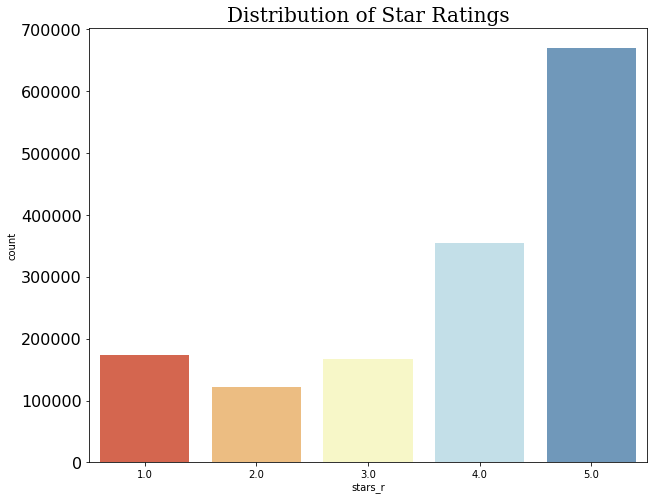

In [25]:
fig,ax= plt.subplots(figsize=(10,8))
plt.yticks(fontsize=16)


sns.countplot(x="stars_r",
              data=review_text,
              palette="RdYlBu",
              linewidth=3)

plt.title("Distribution of Star Ratings",
          font="Serif",
          size=20,color='k')

## User Reviews

#### Number of Reviews by Years

Text(0.5, 1.0, 'Number of reviews per year')

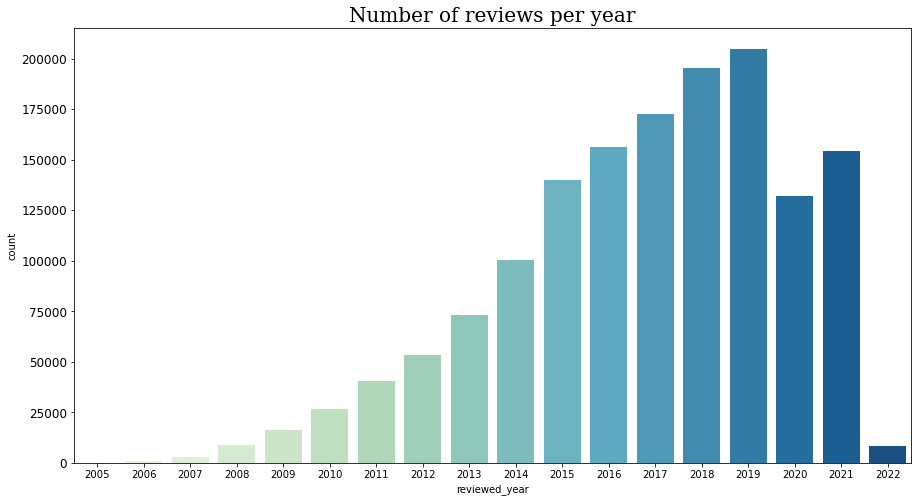

In [26]:
fig,ax= plt.subplots(figsize=(15,8))
plt.yticks(fontsize=12)

years = review_text.reviewed_year 

sns.countplot(x=years,
              palette="GnBu",
              linewidth=3)

plt.title("Number of reviews per year",
          font="Serif",
          size=20,color='k')

In [27]:
review_date = pd.DataFrame(review_text['reviewed_year'].value_counts()).rename(columns={'reviewed_year':'count'})
review_date.sort_index(ascending=True)

,count
2005,85
2006,733
2007,3031
2008,8993
2009,16422
2010,26646
2011,40715
2012,53434
2013,73077
2014,100542


#### Review Text Length Distribution

Text(0.5, 1.0, 'Text Length Distribution')

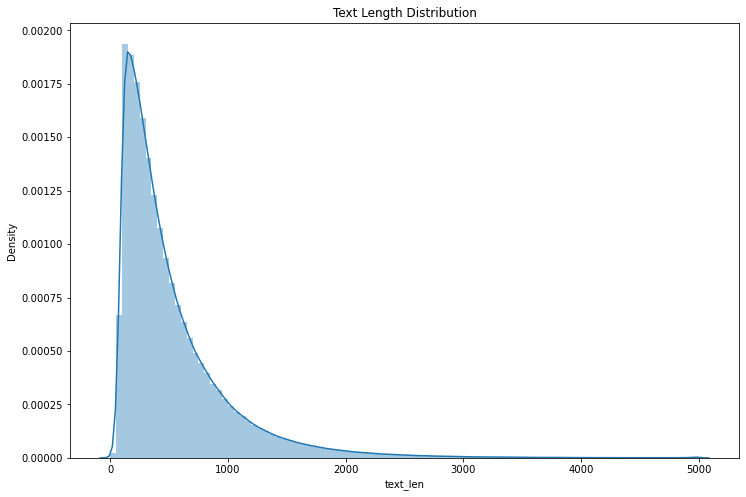

In [28]:
warnings.filterwarnings("ignore")

fig = plt.figure(figsize=(12,8))

sns.distplot(review_text['text_len'], kde=True, bins=100)
plt.title('Text Length Distribution')

## Unique User

#### Number of reviews by Unique Users in Restaurant

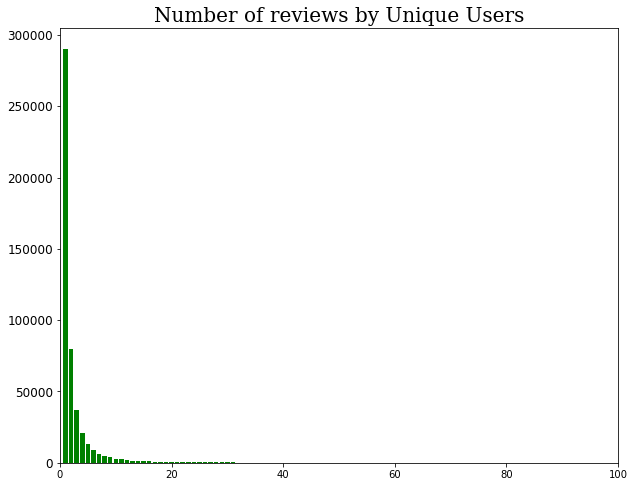

In [29]:

rating_count_count = review_user_renamed.user_id.value_counts().value_counts()  # forgive me for this ;-

fig,ax= plt.subplots(figsize=(10,8))
plt.yticks(fontsize=12)


plt.bar(x=rating_count_count.index,height=rating_count_count,
        color='g')
plt.xlim((0,100))  # as the reviews beyond 100 are very few, clipping the values till 100
plt.title("Number of reviews by Unique Users",
          font="Serif",
          size=20,color='k')
plt.show()

#### Number of years since users joined Yelp

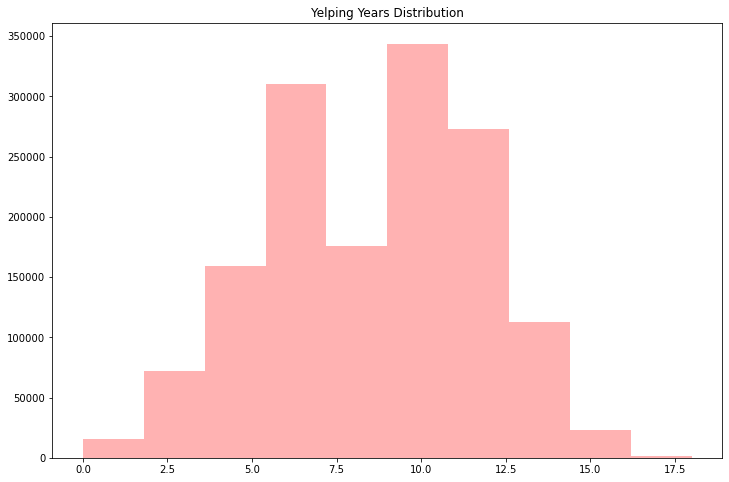

In [30]:
fig = plt.figure(figsize=(12,8))
plt.hist(review_text['yelping_years'], color='r', alpha=0.3)
plt.title('Yelping Years Distribution')
plt.show();

#### Correlation Analysis

Text(0.5, 1.0, 'Correlation Heatmap')

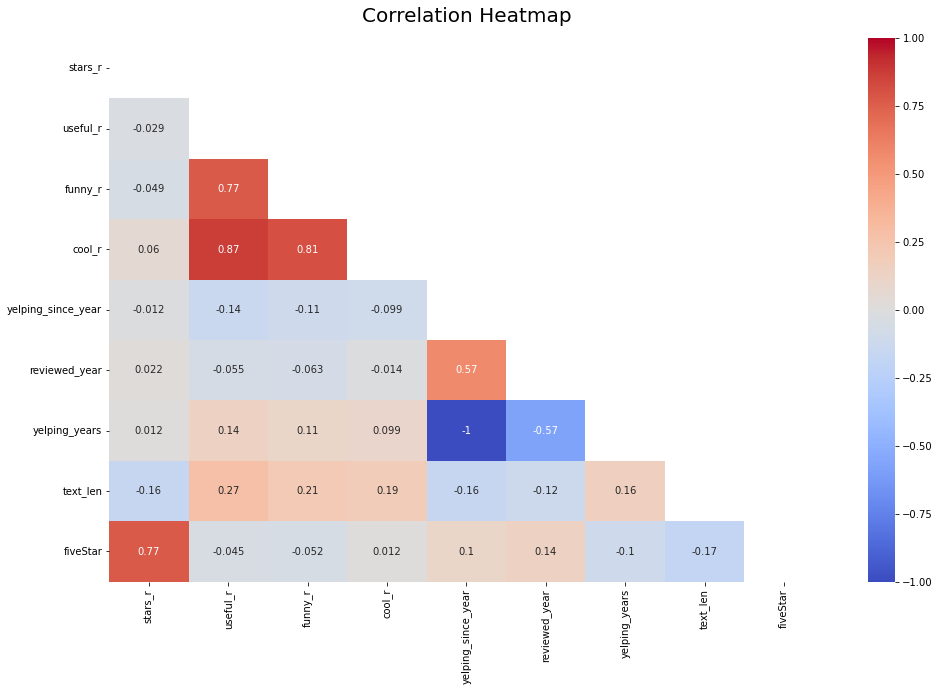

In [31]:
plt.figure(figsize=(16, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(review_text.corr(), dtype=np.bool))
heatmap = sns.heatmap(review_text.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=16)
# sns.set(font_scale=2);

In [32]:
review_text.to_csv('reviews.csv', index=False)

In [ ]:
# tokenization, remove stop words, stemming, & lemmatizing